# Assignment #4


# 1. Basics of Geostatistics (25 pts)

Each observation of an environmental variable in space $z(\mathbf{x})$ can be interpreted as a single realization of a random variable $Z(\mathbf{x})$. Where $\mathbf{x}$ denotes the position in space of the observation. In a given finite region there can be an infinite number of locations $\mathbf{x}$ and thus an infinite number of random variables $Z(\mathbf{x})$. The set of all these random variables $Z(\mathbf{x})$ constitutes a random process. For the remainder of this problem assume $Z_i = Z(\mathbf{x})$ and $z_i = z(\mathbf{x})$.

**A. Explain the difference between $z_i$ and $Z_i$.**

$z_i$ represents the observed value (realization) of the random variable $Z(\mathbf{x})$ at a specific location $\mathbf{x}$. 

$Z_i$ represents the random variable associated with location $\mathbf{x}$, which describes all "unknown" random values which should be predicted based on observed $z_i$. 

**B. Based on the lectures, define $Z^*$ and $Z_0$. Explain the difference between the two.** 

$Z^*$ is the predicted value of $Z_0$ based on surrounding known observed points, where $Z_0$ is the random variable at a specific location (the total of unknow and known values at each location). 

**C. Describe the meaning of $\text{Cov}(Z_i,Z_j)$, $\text{Cov}(Z_i,Z_0)$, $\text{Var}(Z_0)$.**

$\text{Cov}(Z_i,Z_j)$ is the covariance between $Z_i$ and $Z_j$, two observed data points at location $\mathbf{x_i}$ and $\mathbf{x_j}$ respectively. The covariance measures how this two variables correlated with each other based on their distance. The closer two points are, the higher correlation usualy is. 

$\text{Cov}(Z_i,Z_0)$ is the covariance between the a known variable $Z_i$ and an unknown variable of interets $Z_0$ based on their locations. 

$\text{Var}(Z_0)$ is the variance of the random variable, describing the spread of $Z_0$. 

**D. The Simple Kriging system is given by $\Sigma \mathbf{w} = \mathbf{c}$. Explain each term in that equation.**

$\Sigma$ is the covariance matrix between the known locations, which equal to $\text{Cov}(Z_i,Z_j)$. 

$\mathbf{c}$ is the covariance vestor between the locations of known values (observations) and the location of unknown values (ones we want to predict).

$\mathbf{w}$ is the weight vector which will be solved based on the two covariances. The weights determine the contribution of each known location to the predicted value at the unknown location.

**E. Once $\mathbf{w}$ is computed, how can it be used to estimate $z^*$?**

Once $\mathbf{w}$ is computed, the estimate $z^*$ is calculated as a weighted sum of all kknown values as:

$ z^* = \Sigma \mathbf{w_i} z_i$

**F. What is second-order stationarity?**

Second-order stationarity (also called weak stationarity) assumes that:
1. The mean of the random process is constant across space.
2. The covariance between any two points depends only on their spatial separation (the distance and possibly direction between them), not their absolute positions.
This implies that the statistical properties (mean and covariance) of the spatial process are stable over space.

**G. Assuming second-order stationarity, if we are interested in the covariance between $Z_i$ and $Z_j$, why do we concern ourselves with the semivariogram?**

Under second-order stationarity, the covariance between two points depends only on their distance. The semivariogram is related to the covariance as it measures the spatial dependence or variability between two points as a function of their separation. The semivariogram is often preferred because:
1. It is easier to model (especially when using experimental data).
2. It directly reflects how variance increases as the distance between points increases.
Thus, we often model and use the semivariogram to infer the covariance between spatial points in kriging.

**H. Starting from the definition of covariance, derive the relationship between covariance and semivariogram.**

Start with definition of covariance:

$$\text{Cov}(Z_i,Z_j) = E[Z_iZ_j] - E[Z_i]E[Z_j]$$

Let's now define a term $\gamma$ which we are going to call semivariogram:

$$\gamma = E[(Z_i - Z_j)^2] = E[Z_i^2] - 2E[Z_iZ_j] + E[Z_j^2]$$

Solve for $E[Z_iZ_j]$:

$$E[Z_iZ_j] = E[Z_i^2]/2 + E[Z_j^2]/2 - \gamma$$

Plug that into the definition of covariance:

$$\text{Cov}(Z_i,Z_j) = \frac{E[Z_i^2]}{2} + \frac{E[Z_j^2]}{2} - \gamma - E[Z_i]E[Z_j]$$

Given that we assume weak stationarity then:

$$E[Z] = E[Z_i] = E[Z_j]$$

And thus:

$$\text{Cov}(Z_i,Z_j) = \frac{E[Z_i^2] - E[Z_i]^2}{2} + \frac{E[Z_j^2] - E[Z_j]^2}{2} - \gamma$$

By the definition of variance we can then simplify:

$$\text{Cov}(Z_i,Z_j) = \frac{\text{Var}[Z_i]}{2} + \frac{\text{Var}[Z_j]}{2} - \gamma $$

Using the weak stationarity assumption again then:

$$\text{Var}[Z] = \text{Var}[Z_i] = \text{Var}[Z_j]$$

Thus:

$$\text{Cov}(Z_i,Z_j) = \text{Var}[Z] - \gamma$$

# 2. Computing the semivariogram (25 pts)

Using data from the samples group in `/data/HW/HW4.nc`:

A. Assemble the isotropic cloud semivariogram. Plot the results. Only consider distances up to 25000 m. 

B. Having computed the cloud semivariogram, assemble the sample semivariogram using a bin size of 500 m. Plot the results. Only consider distances up to 25000 m.

C. Fit an exponential, spherical, and bounded linear semivariogram to the sample semivariogram. Compute the $R^2$ of each fit then plot the results. Remember to set bounds for the curve fitting, if not it won't converge. Based on your results, which model semivariogram would you use for the region?

In [1]:
import netCDF4 as nc
import numpy as np
path = "/data/HW/HW4/HW4.nc"
fp = nc.Dataset(path,'r')
samples = fp['samples']
x = samples['x'][:]
y = samples['y'][:]
sand = samples['sand'][:]

In [2]:
#Compute euclidean distances from observatins to observations
h = ((x[:,np.newaxis] - x.T)**2 + (y[:,np.newaxis] - y.T)**2)**0.5
# Compute variogram cloud by comparing all points
gamma_c = (sand[:,np.newaxis].T - sand[:,np.newaxis])**2/2

In [3]:
#Reshape to 1d arrays
h = h.reshape(h.size)
gamma_c = gamma_c.reshape(gamma_c.size)

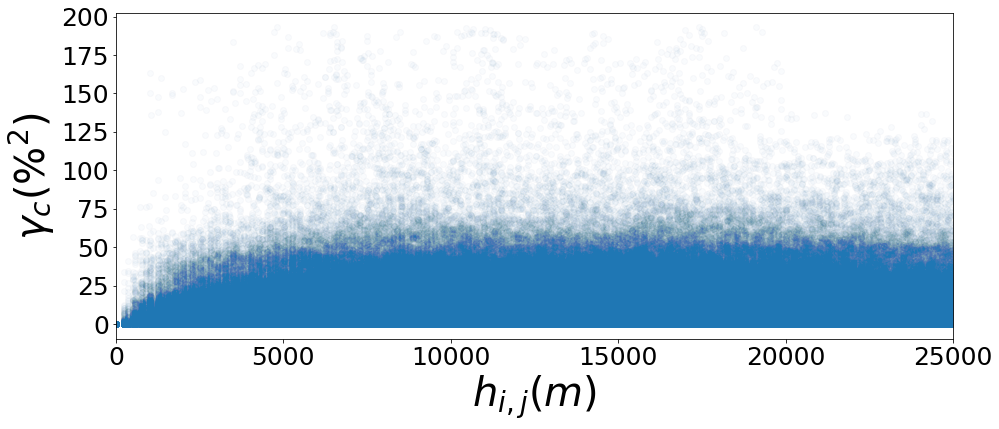

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))

#Make the scatter plot
plt.scatter(h,gamma_c,alpha=0.01)
max_distance = 25000
#Let's only consider points that are up to 25000 meters away from each other
plt.xlim([0,max_distance])

#Pretty up the plot
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'$h_{i,j} (m)$',fontsize=40)
plt.ylabel(r'$\gamma_c(\%^2)$',fontsize=40)
plt.show()

In [5]:
#Define delta
delta = 500 #m

#Define bin edges
bin_edges = np.linspace(0,max_distance,max_distance/delta+1)

#Compute the center of each bin
hd = (bin_edges[1:] + bin_edges[0:-1])/2

#Compute sample semivariogram
gamma_s = []
for i in range(hd.size):
    if i == 0:m = (h >= bin_edges[i]) & (h < bin_edges[i+1])
    else:m = (h > bin_edges[i]) & (h <= bin_edges[i+1])
    tmp = np.mean(gamma_c[m])
    gamma_s.append(tmp)
gamma_s = np.array(gamma_s)

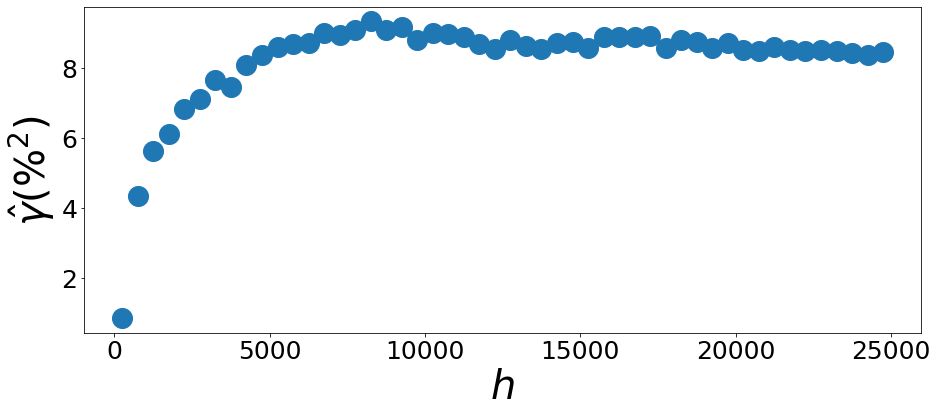

In [6]:
plt.figure(figsize=(15,6))
plt.plot(hd,gamma_s,'o',markersize=20)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'$h$',fontsize=40)
plt.ylabel(r'$\hat{\gamma}(\%^2)$',fontsize=40)
plt.show()

In [7]:
# assume nuggest = 0
def exponential_semivariogram(h,c,tau):
    return c * (1 - np.exp(-h/tau))

# h is an np array, coulnd't write as h<=a 
def spherical_semivariogram(h,c,a):
    return np.where(h < a, c*(1.5*(h/a)-0.5*(h/a)**3), c)

def linear_semivariogram(h,c,a):
    return np.where(h < a, c*h/a, c) 

In [8]:
import scipy.optimize
popt, pcov = scipy.optimize.curve_fit(exponential_semivariogram,hd,gamma_s,bounds=([0,1000],[100,25000]))

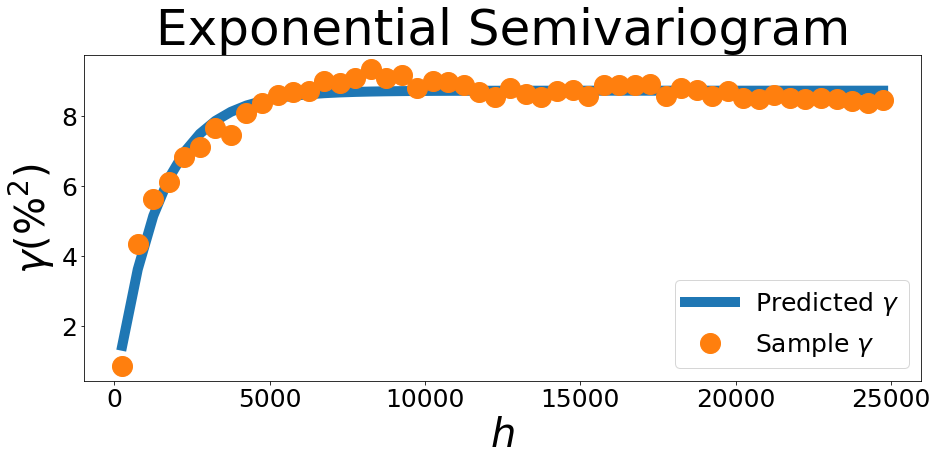

In [9]:
plt.figure(figsize=(15,6))
plt.plot(hd,exponential_semivariogram(hd,*popt),lw=10)
plt.plot(hd,gamma_s,'o',markersize=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Exponential Semivariogram',fontsize=50)
plt.xlabel(r'$h$',fontsize=40)
plt.ylabel(r'$\gamma(\%^2)$',fontsize=40)
plt.legend([r'Predicted $\gamma$',r'Sample $\gamma$'],fontsize=25)
plt.show()

In [10]:
import sklearn.model_selection
ypred = exponential_semivariogram(hd,*popt)
print(r'Exponential - R2: %f' % sklearn.metrics.r2_score(gamma_s.reshape(gamma_s.size),ypred.reshape(ypred.size)))

Exponential - R2: 0.959452


Spherical - R2: 0.898734


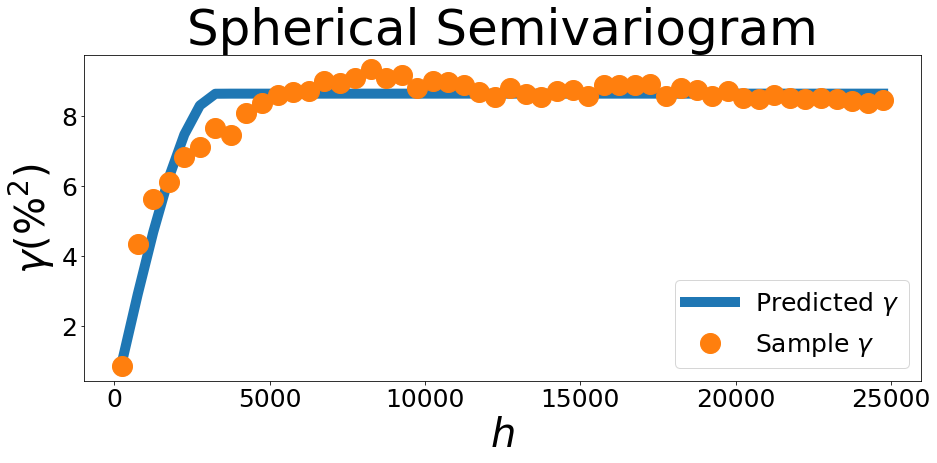

In [11]:
sopt, scov = scipy.optimize.curve_fit(spherical_semivariogram,hd,gamma_s,bounds=([0,1000],[100,25000]))
ypred_s = spherical_semivariogram(hd,*sopt)
print(r'Spherical - R2: %f' % sklearn.metrics.r2_score(gamma_s.reshape(gamma_s.size),ypred_s.reshape(ypred_s.size)))
plt.figure(figsize=(15,6))
plt.plot(hd,ypred_s,lw=10)
plt.plot(hd,gamma_s,'o',markersize=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Spherical Semivariogram',fontsize=50)
plt.xlabel(r'$h$',fontsize=40)
plt.ylabel(r'$\gamma(\%^2)$',fontsize=40)
plt.legend([r'Predicted $\gamma$',r'Sample $\gamma$'],fontsize=25)
plt.show()

Bounded-linear - R2: 0.850210


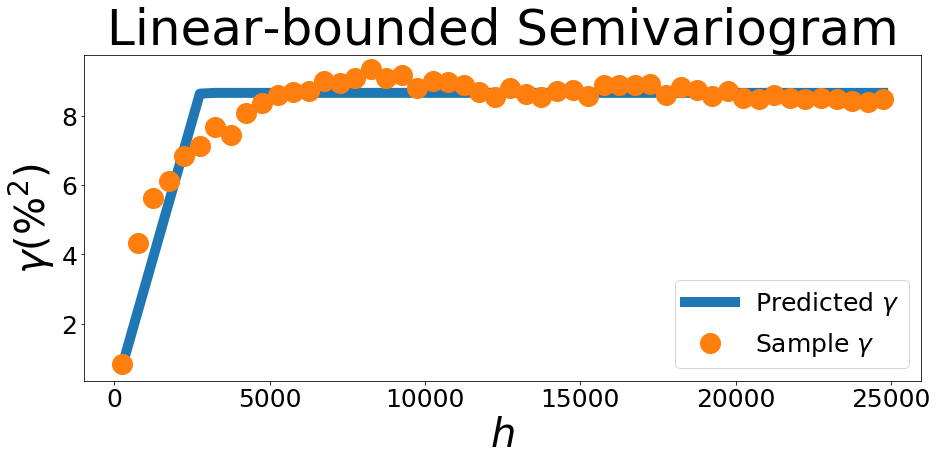

In [12]:
lopt, lcov = scipy.optimize.curve_fit(linear_semivariogram,hd,gamma_s,bounds=([0,1000],[100,25000]))
ypred_l = linear_semivariogram(hd,*lopt)
print(r'Bounded-linear - R2: %f' % sklearn.metrics.r2_score(gamma_s.reshape(gamma_s.size),ypred_l.reshape(ypred_l.size)))
plt.figure(figsize=(15,6))
plt.plot(hd,ypred_l,lw=10)
plt.plot(hd,gamma_s,'o',markersize=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Linear-bounded Semivariogram',fontsize=50)
plt.xlabel(r'$h$',fontsize=40)
plt.ylabel(r'$\gamma(\%^2)$',fontsize=40)
plt.legend([r'Predicted $\gamma$',r'Sample $\gamma$'],fontsize=25)
plt.show()

Based on my result, I would choose the exponential semivariogram resulting the highest R2 score of 0.959. 

# 3. Ordinary Kriging (25 pts)

Using the data in the samples group in '/data/HW/HW4/HW4.nc', and assumming an exponential semivariogram with a sill ($c$) of 10.0 $\%^2$, a nugget of 0, and a range ($a$) of 1500 m, do the following:

A. Use ordinary kriging to try to reproduce the original map of sand (as found in the original_data group in `/data/HW/HW4/HW4.nc`).

B. Plot the reproduced map and the original map. Compare the two via the $R^2$.

C. Compute the estimated mean squared error at each grid cell (kriging variance) and plot the map. Discuss the results. 

D. One of the largest limitations of Kriging is that the observation covariance matrix can become too large. Another more practical approach is to only use the closest $n$ points to each point to which we interpolate. Setting $n = 10$, perform this "localized" ordinary kriging and compare the results to those from part B. 

E. Repeat part D. However, this time set $n=1$. What other deterministic spatial interpolation method does this now mimic?

In [13]:
import netCDF4 as nc
import numpy as np
path = "/data/HW/HW4/HW4.nc"
fp = nc.Dataset(path,'r')
data = fp['original_data']['sand'][:]
xp = fp['original_data']['x'][:]
yp = fp['original_data']['y'][:]
(xs,ys) = np.meshgrid(np.arange(xp.size),np.arange(yp.size))

In [14]:
xp = xp[xs]
yp = yp[ys]

In [15]:
#Let's reshape our data to a 1d array
xg1d = xp.reshape(xp.size)
yg1d = yp.reshape(yp.size)

In [16]:
#Compute euclidean distances from observations to points on grid
dist = ((xg1d[:,np.newaxis] - x.T)**2 + (yg1d[:,np.newaxis] - y.T)**2)**0.5

In [17]:
#Compute covariance matrix C
var = 10
tau = 1500
C = var*np.exp(-dist/tau).T

In [18]:
#Compute euclidean distances from observatins to observations
dist_obs = ((x[:,np.newaxis] - x.T)**2 + (y[:,np.newaxis] - y.T)**2)**0.5

In [19]:
#Compute covariance matrix Sigma
Sigma = var*np.exp(-dist_obs/tau).T
#Append the extra information for the langrange multipliers
#Sigma_prime
Sigma_prime = np.zeros((Sigma.shape[0]+1,Sigma.shape[1]+1))
Sigma_prime[0:-1,0:-1] = Sigma[:]
Sigma_prime[-1,0:-1] = 1
Sigma_prime[0:-1,-1] = 1
#C_prime
C_prime = np.zeros((C.shape[0]+1,C.shape[1]))
C_prime[0:-1,:] = C[:,:]
C_prime[-1,:] = 1

In [20]:
# Solve for the weights
W = np.linalg.solve(Sigma_prime,C_prime)
#Compute zstar
zt = sand[:]
zstar = np.sum(W[0:-1,:]*zt[:,np.newaxis],axis=0)
#Compute mse 
mse = var - np.sum(W[0:-1,:]*C_prime[0:-1,:],axis=0) - W[-1,:]

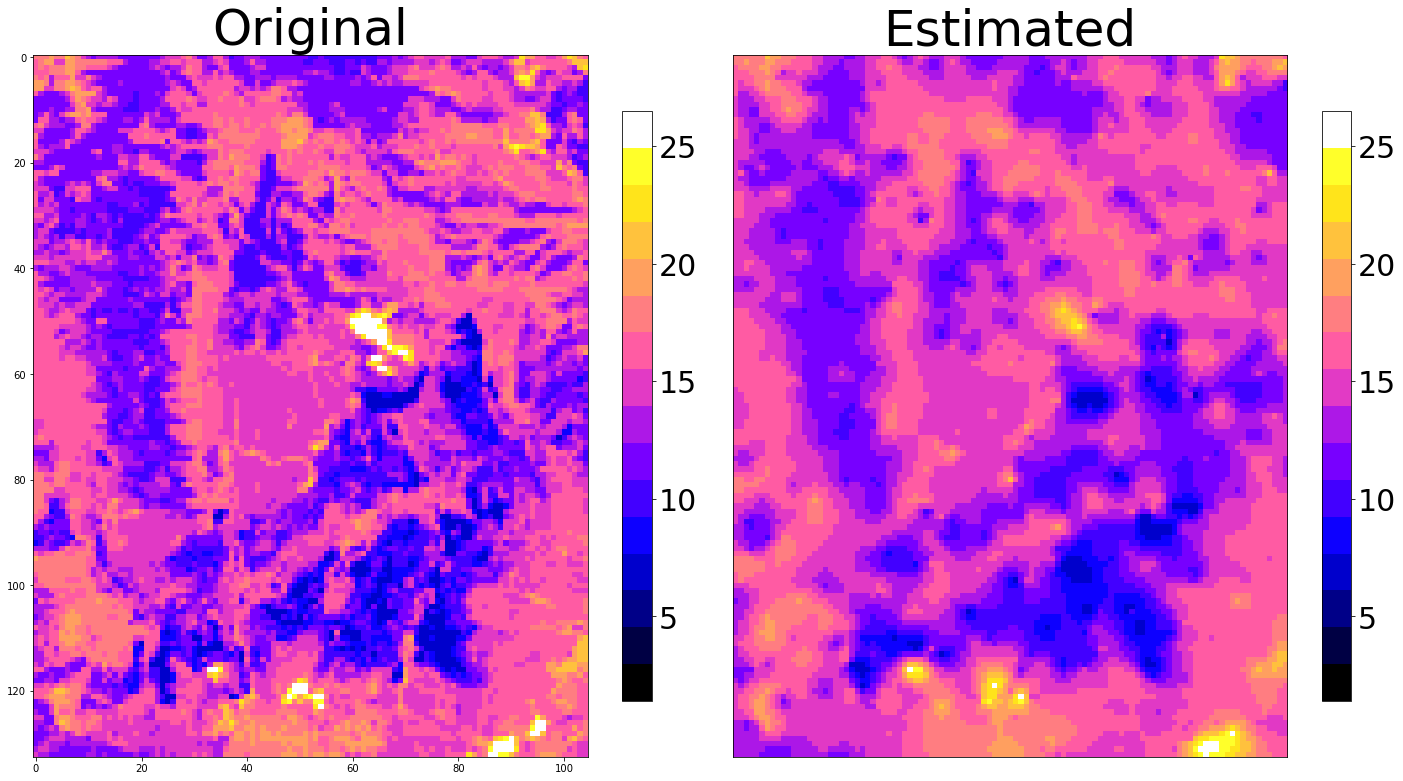

In [21]:
import matplotlib.cm as cm
vmin = min(data.min(), ypred.min())
vmax = max(data.max(), ypred.max())
#Plot the original and kriged data side by side
ypred = zstar.reshape(xp.shape)
plt.figure(figsize=(20,12))
plt.subplot(122)
plt.imshow(ypred,cmap=cm.get_cmap('gnuplot2',16),vmin=vmin,vmax=vmax)
plt.xticks([])
plt.yticks([])
plt.title('Estimated',fontsize=50)
cb = plt.colorbar(shrink=0.7)
cb.ax.tick_params(labelsize=30)
plt.subplot(121)
plt.imshow(data,cmap=cm.get_cmap('gnuplot2',16),vmin=vmin,vmax=vmax)
plt.xticks()
plt.yticks()
plt.title('Original',fontsize=50)
cb = plt.colorbar(shrink=0.7)
cb.ax.tick_params(labelsize=30)
plt.tight_layout()
plt.show()

In [22]:
print(r'R2 - using all observation point: %f' % sklearn.metrics.r2_score(data.reshape(data.size),ypred.reshape(ypred.size)))

R2 - using all observation point: 0.610655


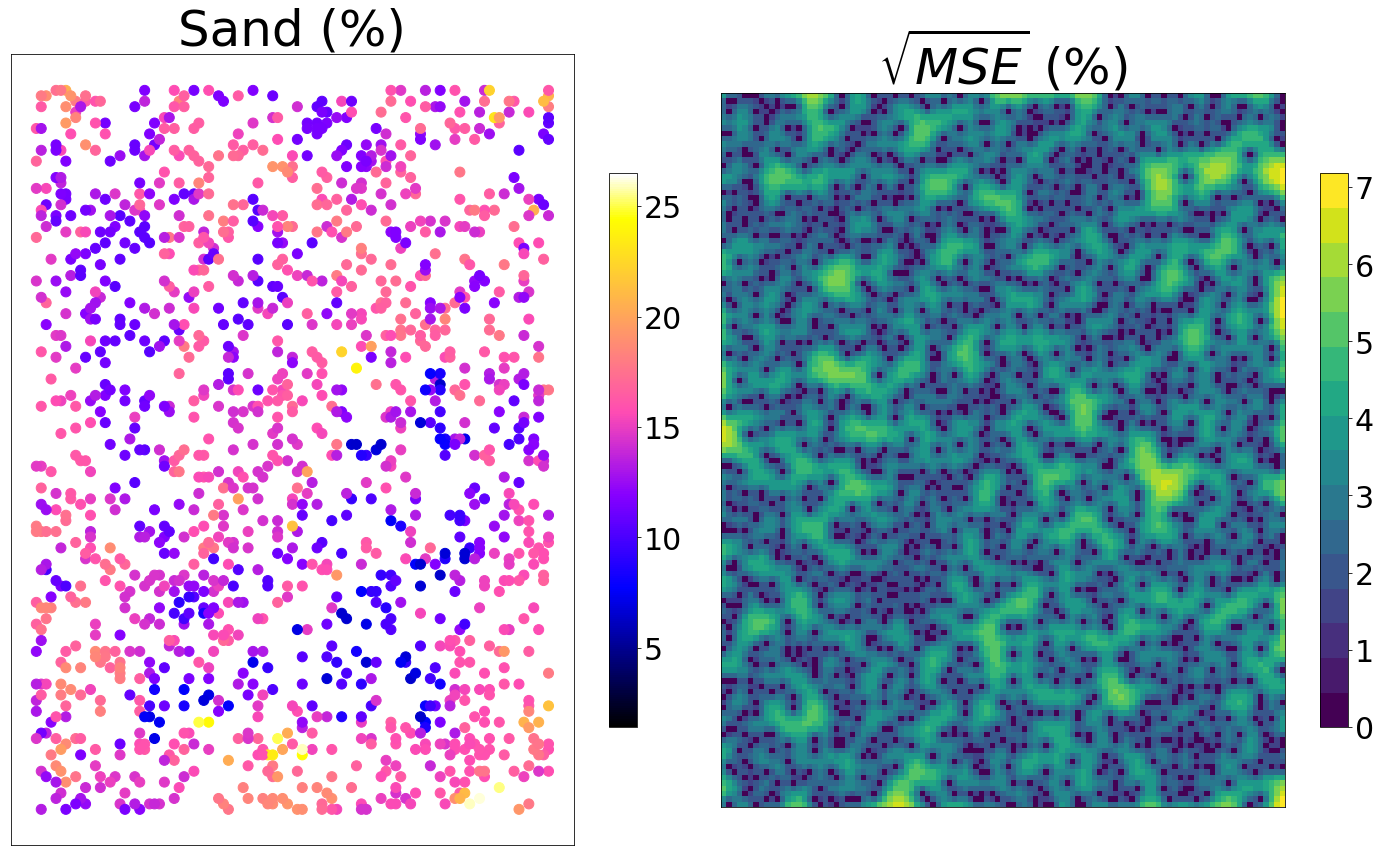

In [23]:
#Plot the original and kriged data side by side
mse_grid = mse.reshape(xp.shape)
plt.figure(figsize=(20,12))
plt.subplot(122)
plt.imshow(mse_grid,cmap=cm.get_cmap('viridis',16))
plt.xticks([])
plt.yticks([])
plt.title(r'$\sqrt{MSE}$ (%)',fontsize=50)
cb = plt.colorbar(shrink=0.7)
cb.ax.tick_params(labelsize=30)
plt.subplot(121)
plt.scatter(x,y,c=sand,s=100,vmin=vmin,vmax=vmax,cmap='gnuplot2')
plt.xticks([])
plt.yticks([])
plt.title('Sand (%)',fontsize=50)
cb = plt.colorbar(shrink=0.7)
cb.ax.tick_params(labelsize=30)
plt.tight_layout()
plt.show()

Comparing the MSE with the observation points showed that the pixel corresponding to the observation point resulted in the lowest MSE and the best estimation/highest accuracy. Pixels closer to the observation points had smaller MSEs, and the predictions were better. However, in areas lacking observation points, the MSE was greater, resulting in poorer estimates.

In [24]:
import numpy as np

def ordinary_kriging_with_n(x_points, y_points, data_points, x_grid, y_grid, var, tau, n=None):
    # Reshape grid data
    xg1d = x_grid.reshape(x_grid.size)
    yg1d = y_grid.reshape(y_grid.size)
    
    # Compute distances between grid points and observation points
    dist_to_obs = ((xg1d[:, np.newaxis] - x_points.T)**2 + (yg1d[:, np.newaxis] - y_points.T)**2)**0.5
    
    # If n is None, use all points for kriging
    if n is None:
        n = len(x_points)  # Use all available points
    
    # Perform kriging for each grid point
    zstar = np.zeros(xg1d.size)  # To store interpolated values
    mse = np.zeros(xg1d.size)
    
    for i in range(xg1d.size):
        # Find indices of n closest points to the grid point
        closest_indices = np.argsort(dist_to_obs[i])[:n]
        
        # Select the n closest points
        closest_x_points = x_points[closest_indices]
        closest_y_points = y_points[closest_indices]
        closest_data_points = data_points[closest_indices]
        
        # Compute covariance matrix C
        dist_to_closest = ((xg1d[i] - closest_x_points)**2 + (yg1d[i] - closest_y_points)**2)**0.5
        C = var * np.exp(-dist_to_closest / tau)
        
        # Compute covariance matrix Sigma
        dist_closest_to_closest = ((closest_x_points[:, np.newaxis] - closest_x_points.T)**2 +
                                   (closest_y_points[:, np.newaxis] - closest_y_points.T)**2)**0.5
        Sigma = var * np.exp(-dist_closest_to_closest / tau)
        
        # Append the extra information for Lagrange multipliers
        Sigma_prime = np.zeros((Sigma.shape[0] + 1, Sigma.shape[1] + 1))
        Sigma_prime[0:-1, 0:-1] = Sigma[:]
        Sigma_prime[-1, 0:-1] = 1
        Sigma_prime[0:-1, -1] = 1
        
        # Append extra info for C_prime
        C_prime = np.zeros(C.shape[0] + 1)
        C_prime[0:-1] = C[:]
        C_prime[-1] = 1
        
        # Solve for weights W
        W = np.linalg.solve(Sigma_prime, C_prime)
        
        # Compute zstar
        zstar[i] = np.sum(W[0:-1] * closest_data_points)
    
        # Compute the mean squared error (kriging variance)
        mse[i] = var - np.sum(W[0:-1] * C) - W[-1]
    
    # Reshape zstar and mse to the original grid shape
    zstar = zstar.reshape(x_grid.shape)
    mse = mse.reshape(x_grid.shape)
    
    return zstar, mse

In [25]:
var = 10
tau = 1500
n = 10
(z_10, mse_10) = ordinary_kriging_with_n(x, y, sand, xp, yp, var, tau, n)

In [26]:
ypred_10 = z_10.reshape(xp.shape)
print(r'R2 - 10 closest points: %f' % sklearn.metrics.r2_score(data.reshape(data.size),ypred_10.reshape(ypred_10.size)))

R2 - 10 closest points: 0.610683


The R² value is slightly higher, but the difference is not significant. The prediction is improved because the closest points have a higher correlation with the predicted pixel, leading to a better prediction.

In [27]:
n = 1
(z_1, mse_1) = ordinary_kriging_with_n(x, y, sand, xp, yp, var, tau, n)
ypred_1 = z_1.reshape(xp.shape)
print(r'R2 - 1 closest point: %f' % sklearn.metrics.r2_score(data.reshape(data.size),ypred_1.reshape(ypred_1.size)))

R2 - 1 closest point: 0.405897


By using only one neighbor for interpolation, this process mimics nearest-neighbor interpolation, which assigns the value of the closest sample point to each prediction location. This method can be computationally efficient but may result in a less smooth surface than kriging with multiple neighbors, resulting in a worse r2 value.

# 4. Calculate upslope drainage area (25 pts)

Using the elevation data found in `/data/HW/HW4/mtdiablo_dem_sf.tif`, show that the upslope drainage area flowing out of the grid cell point i = 582 and j = 779 is 12,856,300 $m^2$. You will need to write up your own recursive algorithm to estimate upslope drainage area for this problem. You will want to use the d8 flow direction approach. In other words, assume that if a ball is dropped on a given grid cell it will follow the path of steepest descent (i.e., the highest slope) to one (and only one) adjacent cell. Note that the pixel size is 10 meters by 10 meters. Furthermore, you may assume that this data has already been sink-filled.

In [28]:
import rasterio
demf = rasterio.open('/data/HW/HW4/mtdiablo_dem_sf.tif')
dem = demf.read(1)

In [40]:
directions = [
        (-1, 0),  # North
        (-1, 1),  # Northeast
        (0, 1),   # East
        (1, 1),   # Southeast
        (1, 0),   # South
        (1, -1),  # Southwest
        (0, -1),  # West
        (-1, -1)  # Northwest
    ]
def flow_direction(dem):
    fdir = np.empty(dem.shape, dtype=object)
        # Iterate over each cell in the DEM
    for i in range(dem.shape[0]):
        for j in range(dem.shape[1]):
            max_slope = 0
            best_direction = None
            
            # Iterate over the neighbors
            for di, dj in directions:
                ni, nj = i + di, j + dj
                if 0 <= ni < dem.shape[0] and 0 <= nj < dem.shape[1]:
                    # Calculate the slope to the neighbor (difference in elevation)
                    s = dem[i, j] - dem[ni, nj]
                    dem_check = s > 0
                    # If the slope is positive (downhill), check if it's the steepest
                    if dem_check & (s > max_slope):
                        max_slope = s
                        best_direction = (ni, nj)
            
            # Store the best flow direction for the current cell
            fdir[i, j] = best_direction
    
    return fdir

In [41]:
flow_dir = flow_direction(dem)

In [81]:
# Create a matrix to store drainage areas
drainage_area = np.zeros_like(dem)

# Set the size of each grid cell (10m x 10m)
cell_area = 10 * 10  # 100 m^2

def calculate_updrainage_area(fd, drainage_area, i, j, check):
    # Base case: if drainage area is already computed for this cell, return it
    check.append((i,j))
    if drainage_area[i, j] > cell_area:
        return drainage_area[i, j]
    
    # Initialize the drainage area for the current cell as its own area
    drainage_area[i, j] = cell_area
    # Iterate over neighboring cells
    for di, dj in directions:
        ni, nj = i + di, j + dj

        # Check if the neighbor is within bounds
        if (ni < 0) or (ni >= fd.shape[0]) or (nj < 0) or (nj >= fd.shape[1]):
            continue

        # Check if the neighbor has a valid flow direction (None means no flow)
        if fd[ni, nj] is None:
            continue

        # Get the flow direction of the neighboring cell
        to_i, to_j = fd[ni, nj]

        # If the neighbor flows into the current cell (i, j)
        if (to_i == i) and (to_j == j):
            # Recursively calculate the drainage area for the neighbor
            drainage_area[i, j] += calculate_updrainage_area(fd, drainage_area, ni, nj, check)

    return drainage_area[i, j]

In [82]:
i, j = 582, 779
check = []
# Calculate the drainage area for the target cell
total_drainage_area = calculate_updrainage_area(flow_dir, drainage_area, i, j, check)
print(f"Total upslope drainage area for cell (582, 779): {total_drainage_area:.2f} m^2")

Total upslope drainage area for cell (582, 779): 12856900.00 m^2
